# MTA Exploratory Data Analysis


In this project i will try to find the top 5 crowded stations and find the weekdays that has more traffic, also i will try to see the effect of COVID-19 on the stations traffic.

# Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick
#from matplotlib import mlab

# Initialise the number of weeks for the dataset, four months = 16 weeks

i took the data starting from 28 december 2019 till 10 april 2020.

In [2]:
num_weeks = 16

#initialise the date for the first week of the dataset (week ending on start_date)
start_date = filedate = pd.Timestamp('2019-12-28 00:00:00')

#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    df = pd.read_csv(filename, parse_dates=[['DATE','TIME']], keep_date_col=True)
    filelist.append(df)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

mta= pd.concat(filelist, axis=0, ignore_index=True)

In [3]:
mta.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-12-21 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,03:00:00,REGULAR,7318040,2480587
1,2019-12-21 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,07:00:00,REGULAR,7318049,2480598
2,2019-12-21 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,11:00:00,RECOVR AUD,7318101,2480680
3,2019-12-21 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,15:00:00,REGULAR,7318263,2480763
4,2019-12-21 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,19:00:00,REGULAR,7318559,2480823


In [4]:
mta.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

# Remove space

In [5]:
mta.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [6]:
mta.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
mta.dtypes

DATE_TIME    datetime64[ns]
C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
dtype: object

# Take the date and time fields into a single datetime column

In [8]:
#mta["DATE_TIME"] = pd.to_datetime(mta.DATE + " " + mta.TIME, format="%m/%d/%Y %H:%M:%S")
mta["DATE"] = pd.to_datetime(mta.DATE)
mta["TIME"] = pd.to_datetime(mta.TIME)

In [9]:
mta.dtypes

DATE_TIME    datetime64[ns]
C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE         datetime64[ns]
TIME         datetime64[ns]
DESC                 object
ENTRIES               int64
EXITS                 int64
dtype: object

In [10]:
mta.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-12-21 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 03:00:00,REGULAR,7318040,2480587
1,2019-12-21 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 07:00:00,REGULAR,7318049,2480598
2,2019-12-21 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 11:00:00,RECOVR AUD,7318101,2480680
3,2019-12-21 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 15:00:00,REGULAR,7318263,2480763
4,2019-12-21 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 19:00:00,REGULAR,7318559,2480823


# Check for duplicated rows and remove them

In [11]:
(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
2964526,R514,R094,00-05-00,ASTORIA BLVD,2020-01-18,2021-09-08 11:00:00,2
519925,H009,R235,00-03-00,BEDFORD AV,2020-03-22,2021-09-08 12:00:00,2
2964546,R514,R094,00-05-00,ASTORIA BLVD,2020-01-21,2021-09-08 19:00:00,2
2964547,R514,R094,00-05-00,ASTORIA BLVD,2020-01-21,2021-09-08 23:00:00,2
2964548,R514,R094,00-05-00,ASTORIA BLVD,2020-01-22,2021-09-08 03:00:00,2


In [12]:
mask = mta["DESC"] == "REGULAR"
mta = mta[mask]

mta.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-12-21 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 03:00:00,REGULAR,7318040,2480587
1,2019-12-21 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 07:00:00,REGULAR,7318049,2480598
3,2019-12-21 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 15:00:00,REGULAR,7318263,2480763
4,2019-12-21 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 19:00:00,REGULAR,7318559,2480823
5,2019-12-21 23:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 23:00:00,REGULAR,7318742,2480852


# Check there are no more duplicated rows

In [14]:
(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head() 

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-12-21 03:00:00,1
2187614,R141,R031,00-03-00,34 ST-PENN STA,2020-01-18 19:00:00,1
2187604,R141,R031,00-03-00,34 ST-PENN STA,2020-01-17 03:00:00,1
2187605,R141,R031,00-03-00,34 ST-PENN STA,2020-01-17 07:00:00,1
2187606,R141,R031,00-03-00,34 ST-PENN STA,2020-01-17 11:00:00,1


# Get the number of daily entries and exits

In [15]:
mta_daily = (mta.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)["ENTRIES", "EXITS"].first())

<ipython-input-15-0bb6dbd10bd5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_daily = (mta.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)["ENTRIES", "EXITS"].first())


In [16]:
mta_daily[["PREV_ENTRIES"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["ENTRIES"].apply(lambda grp: grp.shift(1)))
mta_daily[["PREV_EXITS"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["EXITS"].apply(lambda grp: grp.shift(1)))

In [17]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2019-12-21,7318040,2480587,NaN,NaN
1,A002,R051,02-00-00,59 ST,2019-12-22,7318773,2480861,7318040.0,2480587.0
2,A002,R051,02-00-00,59 ST,2019-12-23,7319388,2481046,7318773.0,2480861.0
3,A002,R051,02-00-00,59 ST,2019-12-24,7320754,2481490,7319388.0,2481046.0
4,A002,R051,02-00-00,59 ST,2019-12-25,7321769,2481788,7320754.0,2481490.0


# Drop the rows for the earliest date in the df

In [18]:
mta_daily.dropna(subset=["PREV_ENTRIES", "PREV_EXITS"], axis=0, inplace=True)

# Solve reverse counter problem

In [19]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

76 9437450.0
4 7832195.0
458780 85175007.0
1176 1180387.0
309 7251357.0
696 1203538.0
209 1090783.0
435 6612150.0
2031652 367632.0
170526823 1802589.0
475957442 7480934.0
2729 3117758.0
618293 2633475.0
17126293 19675797.0
15065833 17126095.0
25525733 15065579.0
12309510 25525268.0
1797 1455622.0
209 1100925.0
3547 6132538.0
108 8294888.0
35 168627967.0
570 2379784.0
7 2344491.0
10 11957681.0
321184286 5645170.0
307624726 321184286.0
722 4895019.0
55 1317615.0
4785511 11470775.0
66 4835856.0
419 2018060.0
270532634 535694.0
1287 14003866.0
167 2300797.0
393296 2064683.0
2944 6568201.0
587 22737699.0
497 3854848.0
524549 118146212.0
3 69159701.0
38 9500468.0
127 8437383.0
1622 1510930.0
137 2311116.0
1245970956 1791.0
4 3529766.0
53 7703724.0
577350 2819465.0
1 9046508.0
155 1516952.0
629 3243187.0
215 1408008.0
106 2787750.0
53 4982193.0
572 7270898.0
36579557 339447.0
449 21914733.0
1224795380 6296.0
1847 9753069.0
1022 12445572.0
2177 16347721.0
16 6566042.0
1254418324 28554762.0
315

In [20]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_daily["DAILY_EXITS"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

7 4099415.0
2 2864415.0
82197 1291816.0
149 4485322.0
13 5293486.0
169 1048502.0
788531266 1305907.0
1400092338 6469823.0
6511 8586367.0
18786 1725877.0
22672746 30044349.0
16292294 22672629.0
14068922 16292137.0
2609957 14068586.0
2545 4515876.0
576 6729019.0
33 168645449.0
149 1117162.0
29 7223168.0
145 2272707.0
321184241 9436074.0
307624726 321184237.0
135 2149338.0
20 1755082.0
11 1942149.0
132306 5312021.0
1239 2732359.0
880808065 43994.0
601 16228523.0
910 6336194.0
65606 1772207.0
1750 17076569.0
170 6228595.0
14 3360199.0
102 2021939.0
27 17180505.0
106 7493063.0
552 4815706.0
407 2026882.0
1395851703 1702.0
616993 7651207.0
6 9139164.0
231 1685207.0
651 4484841.0
625 1751132.0
58 1311833.0
34 6387404.0
1681 15475869.0
167 14609621.0
150933491 5402.0
877 8005524.0
311 10789451.0
1666 13737405.0
10 6350149.0
2048961149 12629017.0
1618 2048959834.0
1831993325 107977.0
477 5864208.0
320 1490254.0
36 2652134.0
0 1613605.0
312 5876524.0
38 1300466.0
510 5173629.0
2283 1610751.0
111

In [21]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2019-12-22,7318773,2480861,7318040.0,2480587.0,733.0,274.0
2,A002,R051,02-00-00,59 ST,2019-12-23,7319388,2481046,7318773.0,2480861.0,615.0,185.0
3,A002,R051,02-00-00,59 ST,2019-12-24,7320754,2481490,7319388.0,2481046.0,1366.0,444.0
4,A002,R051,02-00-00,59 ST,2019-12-25,7321769,2481788,7320754.0,2481490.0,1015.0,298.0
5,A002,R051,02-00-00,59 ST,2019-12-26,7322025,2481877,7321769.0,2481788.0,256.0,89.0


# Add weekday and traffic columns to the dataset

In [22]:
copy_mta_daily = mta_daily.copy()

In [23]:
copy_mta_daily['WEEKDAY'] = copy_mta_daily['DATE'].dt.day_name()
copy_mta_daily['TRAFFIC'] = copy_mta_daily['DAILY_ENTRIES'] + copy_mta_daily['DAILY_EXITS']

In [43]:
copy_mta_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,WEEKDAY,TRAFFIC
1,A002,R051,02-00-00,59 ST,2019-12-22,7318773,2480861,7318040.0,2480587.0,733.0,274.0,Sunday,1007.0
2,A002,R051,02-00-00,59 ST,2019-12-23,7319388,2481046,7318773.0,2480861.0,615.0,185.0,Monday,800.0
3,A002,R051,02-00-00,59 ST,2019-12-24,7320754,2481490,7319388.0,2481046.0,1366.0,444.0,Tuesday,1810.0
4,A002,R051,02-00-00,59 ST,2019-12-25,7321769,2481788,7320754.0,2481490.0,1015.0,298.0,Wednesday,1313.0
5,A002,R051,02-00-00,59 ST,2019-12-26,7322025,2481877,7321769.0,2481788.0,256.0,89.0,Thursday,345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549237,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-04-06,5554,514,5554.0,514.0,0.0,0.0,Monday,0.0
549238,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-04-07,5554,514,5554.0,514.0,0.0,0.0,Tuesday,0.0
549239,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-04-08,5554,514,5554.0,514.0,0.0,0.0,Wednesday,0.0
549240,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-04-09,5554,514,5554.0,514.0,0.0,0.0,Thursday,0.0


# Group by stations

In [25]:
mta_bystation = (copy_mta_daily.groupby(["STATION", "DATE"],as_index=False).ENTRIES.sum())
mta_bystation["EXITS"] = copy_mta_daily.groupby(["STATION", "DATE"],as_index=False).EXITS.sum()["EXITS"]
mta_bystation.head(10)

,STATION,DATE,ENTRIES,EXITS
0,1 AV,2019-12-22,456363393,445189211
1,1 AV,2019-12-23,456368236,445194566
2,1 AV,2019-12-24,456380702,445209114
3,1 AV,2019-12-25,456389915,445220409
4,1 AV,2019-12-26,456393361,445225334
5,1 AV,2019-12-27,456403097,445238392
6,1 AV,2019-12-28,456414867,445253352
7,1 AV,2019-12-29,456420932,445260286
8,1 AV,2019-12-30,456425695,445265997
9,1 AV,2019-12-31,456438626,445282415


In [26]:
mta_bystation = copy_mta_daily.groupby(['STATION','DATE','WEEKDAY']).sum().reset_index()

In [27]:
mta_bystation

,STATION,DATE,WEEKDAY,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
0,1 AV,2019-12-22,Sunday,456363393,445189211,456357026.0,445181804.0,6367.0,7407.0,13774.0
1,1 AV,2019-12-23,Monday,456368236,445194566,456363393.0,445189211.0,4843.0,5355.0,10198.0
2,1 AV,2019-12-24,Tuesday,456380702,445209114,456368236.0,445194566.0,12466.0,14548.0,27014.0
3,1 AV,2019-12-25,Wednesday,456389915,445220409,456380702.0,445209114.0,9213.0,11295.0,20508.0
4,1 AV,2019-12-26,Thursday,456393361,445225334,456389915.0,445220409.0,3446.0,4925.0,8371.0
...,...,...,...,...,...,...,...,...,...,...
41931,ZEREGA AV,2020-04-06,Monday,2523980,1534413,2523806.0,1534169.0,174.0,244.0,418.0
41932,ZEREGA AV,2020-04-07,Tuesday,2524338,1534832,2523980.0,1534413.0,358.0,419.0,777.0
41933,ZEREGA AV,2020-04-08,Wednesday,2524672,1535251,2524338.0,1534832.0,334.0,419.0,753.0
41934,ZEREGA AV,2020-04-09,Thursday,2524991,1535654,2524672.0,1535251.0,319.0,403.0,722.0


# Check for top 5 stations by turnstile traffic

In [28]:
mta_top5 = mta_bystation.groupby('STATION').sum().reset_index().sort_values('TRAFFIC', ascending=False).head(5)
mta_top5

,STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
61,34 ST-PENN STA,470892959757,506486253914,4.697726e+11,5.053852e+11,12355365.0,11455334.0,23810699.0
233,GRD CNTRL-42 ST,280717402713,379940251679,2.807276e+11,3.799439e+11,10239424.0,9923135.0,20162559.0
59,34 ST-HERALD SQ,499742998548,639221855806,4.998974e+11,6.392672e+11,9084423.0,9037910.0,18122333.0
46,23 ST,632389819365,619433063030,6.321122e+11,6.185468e+11,9310729.0,6870625.0,16181354.0
110,86 ST,159385010694,254335325210,1.595450e+11,2.543970e+11,7623651.0,7095757.0,14719408.0


# Plot traffic by stations

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '34 ST-PENN STA'),
  Text(1, 0, 'GRD CNTRL-42 ST'),
  Text(2, 0, '34 ST-HERALD SQ'),
  Text(3, 0, '23 ST'),
  Text(4, 0, '86 ST')])

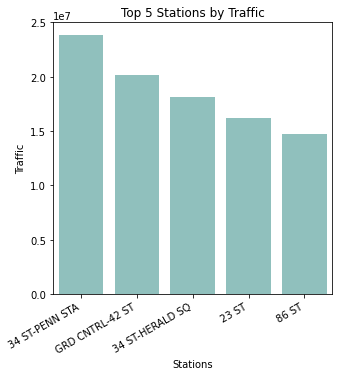

In [87]:
fig = plt.figure(figsize=(5,5))
sns.barplot(data=mta_top5, x = 'STATION', y = 'TRAFFIC', color='#88c8c4').set(title='Top 5 Stations by Traffic', xlabel='Stations', ylabel='Traffic')
plt.xticks(rotation=30, ha='right')


# Plot traffic by week days

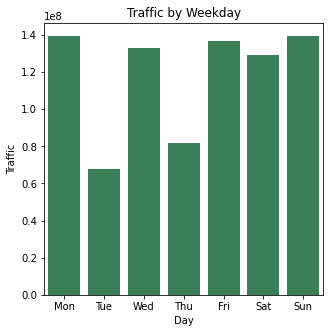

In [148]:
fig, axs = plt.subplots(nrows=1,figsize=(5,5))

sns.barplot(data = copy_mta_daily.groupby('WEEKDAY').sum().reset_index(), x='WEEKDAY', y='TRAFFIC', color="seagreen",ax=axs, label="Traffic").set(title='Traffic by Weekday', xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], xlabel='Day', ylabel='Traffic');

axs = plt.gca()

# COVID effect on stations traffic

I explored 4 months of data starting from the end of december 2019 till april 2020. New york shout down started at the end of march - start of april 2020. i took data from one of the top stations before covid and after. we can see the traffic decreases.

In [102]:
#mask to choose specific turnstile on top crowded station before covid
mask = ((copy_mta_daily["STATION"] == "34 ST-PENN STA") &
        (copy_mta_daily["DATE"] == "2019-12-22") & 
        (copy_mta_daily["UNIT"] == "R012") & 
        (copy_mta_daily["SCP"] == "00-00-00"))

copy_mta_daily[mask].TRAFFIC

141661    1862.0
Name: TRAFFIC, dtype: float64

In [103]:
#mask to choose specific turnstile on top crowded station after covid
mask2 =((copy_mta_daily["STATION"] == "34 ST-PENN STA") &
        (copy_mta_daily["DATE"] == "2020-04-10") &          
        (copy_mta_daily["UNIT"] == "R012") & 
        (copy_mta_daily["SCP"] == "00-00-00"))

copy_mta_daily[mask2].TRAFFIC


141771    38.0
Name: TRAFFIC, dtype: float64

# Plot the traffic before and after COVID

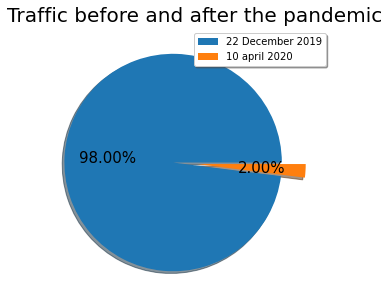

In [139]:
slices = [1862, 38]
exp = [0.2,0.02]

plt.figure(figsize = [5,5]) # "adjust figure size"
plt.pie(slices,#labels=['22 December', ' 10 april'],
        textprops=dict(size=15,color='black'),shadow=True, explode=exp,autopct='%2.2f%%');
plt.title('Traffic before and after the pandemic',color='black',size=20)
plt.legend(['22 December 2019','10 april 2020'],shadow = True, loc = "best");